In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import GeneralETL_PyFile as ETL
%matplotlib inline

df = pd.read_excel('TechImpactCensusData.xlsx')

0               NAICS2017_LABEL SEX_LABEL ETH_GROUP_LABEL RACE_GROUP_LABEL  \
1         Total for all sectors     Total           Total            Total   
2         Total for all sectors     Total           Total            Total   
3         Total for all sectors     Total           Total            Total   
4         Total for all sectors     Total           Total            Total   
5         Total for all sectors     Total           Total            Total   
...                         ...       ...             ...              ...   
5496  Industries not classified     Total           Total            Total   
5497  Industries not classified     Total           Total            Total   
5498  Industries not classified     Total           Total            Total   
5499  Industries not classified     Total           Total            Total   
5500  Industries not classified     Total           Total            Total   

0    VET_GROUP_LABEL NSFSZFI_LABEL FACTORS_P  \
1              

In [4]:
cloud_factor = ['T2E36R01','T2E36R02','T2E36R03','T2E36R04','T2E36R05','T2E36R06','T2E36R07','T2E36R08']
ai_factor = ['T1E36R01','T1E36R02','T1E36R03','T1E36R04','T1E36R05','T1E36R06','T1E36R07','T1E36R08']
sftwr_factor = ['T3E36R01','T3E36R02','T3E36R03','T3E36R04','T3E36R05','T3E36R06','T3E36R07','T3E36R08']

In [6]:
# health dataframes filtered by technologies
cbhealth = df[(df.NAICS2017_LABEL == 'Health care and social assistance')]
cbhealth = cbhealth[cbhealth.FACTORS_P.isin(cloud_factor)]

aihealth = df[(df.NAICS2017_LABEL == 'Health care and social assistance')]
aihealth = aihealth[aihealth.FACTORS_P.isin(ai_factor)]

swhealth = df[(df.NAICS2017_LABEL == 'Health care and social assistance')]
swhealth = swhealth[swhealth.FACTORS_P.isin(sftwr_factor)]

cbhealth.shape
print(cbhealth)

0                       NAICS2017_LABEL SEX_LABEL ETH_GROUP_LABEL  \
5260  Health care and social assistance     Total           Total   
5261  Health care and social assistance     Total           Total   
5262  Health care and social assistance     Total           Total   
5263  Health care and social assistance     Total           Total   
5264  Health care and social assistance     Total           Total   
5265  Health care and social assistance     Total           Total   
5284  Health care and social assistance     Total           Total   
5285  Health care and social assistance     Total           Total   

0    RACE_GROUP_LABEL VET_GROUP_LABEL NSFSZFI_LABEL FACTORS_P  \
5260            Total           Total     All firms  T2E36R01   
5261            Total           Total     All firms  T2E36R02   
5262            Total           Total     All firms  T2E36R03   
5263            Total           Total     All firms  T2E36R04   
5264            Total           Total     All firms  

In [7]:
# health cloud-based 
labels = list(cbhealth['FACTORS_P_LABEL'])
replace_labels = ['Too expensive','Tech not mature','Improper Data','Unreliable Data','Insufficient Talent','Laws and Regulations','Security Concerns','Insufficient Capital']

cbhealth['FACTORS_P_LABEL'] = cbhealth['FACTORS_P_LABEL'].replace(labels,replace_labels)
cbhealth = cbhealth[['FACTORS_P_LABEL','FIRMPDEMP']]
cbhealth.set_index(['FACTORS_P_LABEL'],inplace=True)

In [8]:
# health ai
labels = list(aihealth['FACTORS_P_LABEL'])

aihealth['FACTORS_P_LABEL'] = aihealth['FACTORS_P_LABEL'].replace(labels,replace_labels)
aihealth = aihealth[['FACTORS_P_LABEL','FIRMPDEMP']]
aihealth.set_index(['FACTORS_P_LABEL'],inplace=True)

In [9]:
# health software
labels = list(swhealth['FACTORS_P_LABEL'])

swhealth['FACTORS_P_LABEL'] = swhealth['FACTORS_P_LABEL'].replace(labels,replace_labels)
swhealth = swhealth[['FACTORS_P_LABEL','FIRMPDEMP']]
swhealth.set_index(['FACTORS_P_LABEL'],inplace=True)

In [7]:
health = cbhealth
print(health)
health.columns = ['Cloud-Based Technology']
health['Specialized Software'] = swhealth['FIRMPDEMP']
health['AI Technology'] = aihealth['FIRMPDEMP']

print(health)

In [8]:
## found that too expensive >> than other limiting factors
#graph_labels = ['Too\nexpensive','Tech not\nmature','Improper\nData','Unreliable\nData','Insufficient\nTalent','Laws and\nRegulations','Security\nConcerns','Insufficient\nCapital']
# color_list = ['cornflowerblue','lightgreen','silver']
# health.plot(kind='bar',color=color_list,figsize=(12,5),title='Health Technology Broken Down by Limiting Factor',xlabel='Limiting Factor',ylabel='Count of Health Firms')

In [9]:
# dropped 'Too expensive' index to see distribution of other factors
h1 = health.drop(['Too expensive'],axis=0)
h1_sorted = h1.sort_values(by='Cloud-Based Technology',ascending=False)

<AxesSubplot:title={'center':'Health Technologies Broken Down by Limiting Factor'}, xlabel='Limiting Factor', ylabel='Count of Health Firms'>

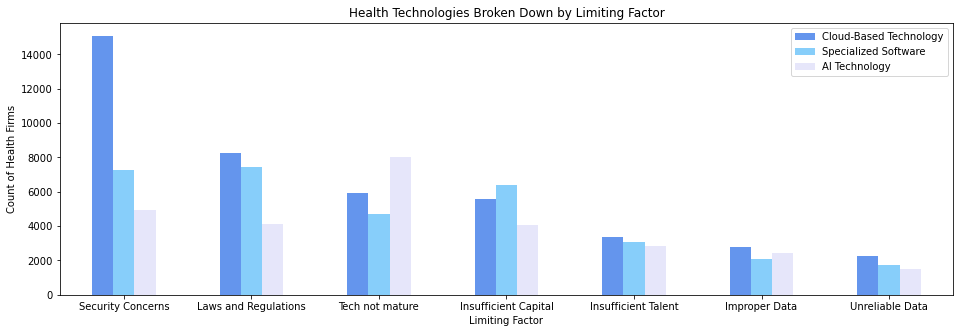

In [27]:
# plotting limiting factors in health sector
color_list = ['cornflowerblue','lightskyblue','lavender']
h1_sorted.plot(kind='bar',color=color_list,figsize=(16,5),rot=0,title='Health Technologies Broken Down by Limiting Factor',xlabel='Limiting Factor',ylabel='Count of Health Firms')

In [11]:
# comparing 'Too expensive' to 'Other' [grouped factors]
group = ['Too expensive','Other','Other','Other','Other','Other','Other','Other']
health['Group'] = group
h2 = health.groupby('Group').sum()
h2

,Cloud-Based Technology,Specialized Software,AI Technology
Group,,,
Other,43272,32735,27896
Too expensive,31330,33254,28028


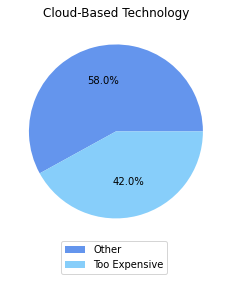

In [12]:
# cloud-based too expensive pie chart
pie_labels = ['Other','Too Expensive']
pie_colors = ['cornflowerblue','lightskyblue']
plt.pie(h2['Cloud-Based Technology'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Cloud-Based Technology')
plt.legend(pie_labels,bbox_to_anchor=(.76, .02))

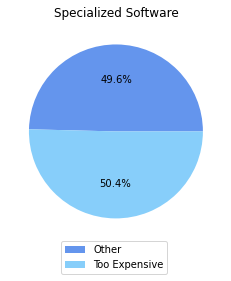

In [13]:
# software too expensive pie chart
pie_labels = ['Other','Too Expensive']
pie_colors = ['cornflowerblue','lightskyblue']
plt.pie(h2['Specialized Software'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Specialized Software')
plt.legend(pie_labels,bbox_to_anchor=(.76, .02))

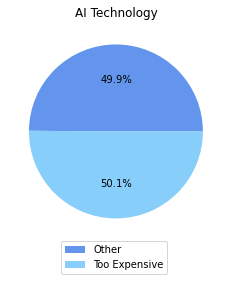

In [14]:
# ai too expensive pie chart
pie_labels = ['Other','Too Expensive']
pie_colors = ['cornflowerblue','lightskyblue']
plt.pie(h2['AI Technology'],autopct='%1.1f%%',colors=pie_colors)
plt.title('AI Technology')
plt.legend(pie_labels,bbox_to_anchor=(.76, .02))

In [15]:
# finance dataframes filtered by technologies
cbfin = df[(df.NAICS2017_LABEL == 'Finance and insurance')]
cbfin = cbfin[cbfin.FACTORS_P.isin(cloud_factor)]

aifin = df[(df.NAICS2017_LABEL == 'Finance and insurance')]
aifin = aifin[aifin.FACTORS_P.isin(ai_factor)]

swfin = df[(df.NAICS2017_LABEL == 'Finance and insurance')]
swfin = swfin[swfin.FACTORS_P.isin(sftwr_factor)]

In [17]:
labels = list(cbfin['FACTORS_P_LABEL'])
replace_labels = ['Too expensive','Tech not mature','Improper Data','Unreliable Data','Insufficient Talent','Laws and Regulations','Security Concerns','Insufficient Capital']

cbfin['FACTORS_P_LABEL'] = cbfin['FACTORS_P_LABEL'].replace(labels,replace_labels)
cbfin = cbfin[['FACTORS_P_LABEL','FIRMPDEMP']]
cbfin.set_index(['FACTORS_P_LABEL'],inplace=True)

labels = list(aifin['FACTORS_P_LABEL'])

aifin['FACTORS_P_LABEL'] = aifin['FACTORS_P_LABEL'].replace(labels,replace_labels)
aifin = aifin[['FACTORS_P_LABEL','FIRMPDEMP']]
aifin.set_index(['FACTORS_P_LABEL'],inplace=True)

labels = list(swfin['FACTORS_P_LABEL'])

swfin['FACTORS_P_LABEL'] = swfin['FACTORS_P_LABEL'].replace(labels,replace_labels)
swfin = swfin[['FACTORS_P_LABEL','FIRMPDEMP']]
swfin.set_index(['FACTORS_P_LABEL'],inplace=True)

In [18]:
fin = cbfin
fin.columns = ['Cloud-Based Technology']
fin['Specialized Software'] = swfin['FIRMPDEMP']
fin['AI Technology'] = aifin['FIRMPDEMP']

In [21]:
f1 = fin.drop(['Too expensive'],axis=0)
f1_sorted = f1.sort_values(by='Cloud-Based Technology',ascending=False)

<AxesSubplot:title={'center':'Finance Technologies Broken Down by Limiting Factor'}, xlabel='Limiting Factor', ylabel='Count of Health Firms'>

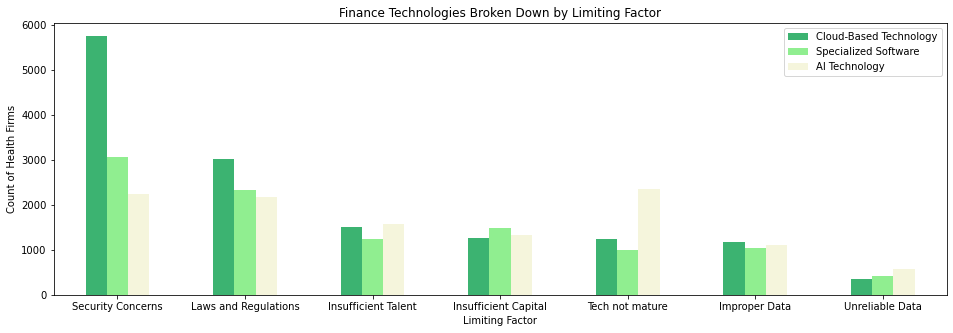

In [30]:
color_list = ['mediumseagreen','lightgreen','beige']
f1_sorted.plot(kind='bar',color=color_list,figsize=(16,5),rot=0,title='Finance Technologies Broken Down by Limiting Factor',xlabel='Limiting Factor',ylabel='Count of Finance Firms')

In [31]:
# comparing 'Too expensive' to 'Other' [grouped factors]
group = ['Too expensive','Other','Other','Other','Other','Other','Other','Other']
fin['Group'] = group
f2 = fin.groupby('Group').sum()
h2

,Cloud-Based Technology,Specialized Software,AI Technology
Group,,,
Other,43272,32735,27896
Too expensive,31330,33254,28028


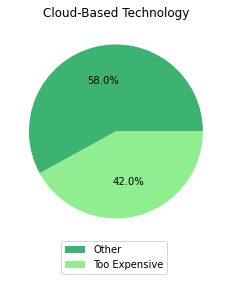

In [33]:
# cloud-based too expensive pie chart
pie_labels = ['Other','Too Expensive']
pie_colors = ['mediumseagreen','lightgreen']
plt.pie(h2['Cloud-Based Technology'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Cloud-Based Technology')
plt.legend(pie_labels,bbox_to_anchor=(.76, .02))

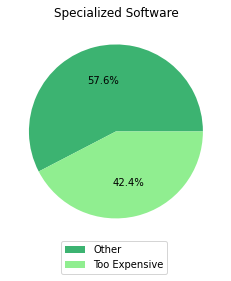

In [32]:
# software too expensive pie chart
pie_labels = ['Other','Too Expensive']
pie_colors = ['mediumseagreen','lightgreen']
plt.pie(f2['Specialized Software'],autopct='%1.1f%%',colors=pie_colors)
plt.title('Specialized Software')
plt.legend(pie_labels,bbox_to_anchor=(.76, .02))

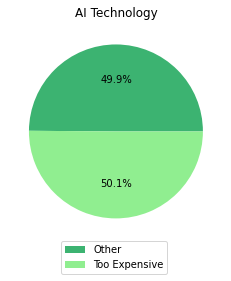

In [34]:
# ai too expensive pie chart
pie_labels = ['Other','Too Expensive']
pie_colors = ['mediumseagreen','lightgreen']
plt.pie(h2['AI Technology'],autopct='%1.1f%%',colors=pie_colors)
plt.title('AI Technology')
plt.legend(pie_labels,bbox_to_anchor=(.76, .02))